In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # for x-y-split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from scipy.stats import boxcox
from sklearn.preprocessing import minmax_scale
import statsmodels.api as sm
# from scipy.stats import boxcox
pd.options.display.max_rows = 50
pd.options.display.max_columns = 999

<b>  load weather data

In [2]:
def load_original_data():
    return pd.read_csv("Data/weatherHistory.csv" )

In [3]:
def clean_data(df):
    df.columns=[e.lower().replace(' ', '_') for e in df.columns]
    df=df.dropna()
    #df['formatted_date']=pd.to_datetime(df['formatted_date'], errors='ignore')
    df['formatted_date'] = df['formatted_date'].str.slice(stop=16)
    df['formatted_date']=pd.to_datetime(df['formatted_date'], errors='ignore')   
# df["month"]=list(map(lambda date:date.strftime(format="%B"),df["effective_to_date"]))
    return df

In [4]:
customers_df=load_original_data()


In [5]:
customers_df=clean_data(customers_df)

/var/folders/f7/nrx6vpxx0kg9wqs44f_6zwkr0000gn/T/ipykernel_34931/3931550251.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['formatted_date'] = df['formatted_date'].str.slice(stop=16)
/var/folders/f7/nrx6vpxx0kg9wqs44f_6zwkr0000gn/T/ipykernel_34931/3931550251.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['formatted_date']=pd.to_datetime(df['formatted_date'], errors='ignore')


In [6]:
customers_df

,formatted_date,summary,precip_type,temperature_(c),apparent_temperature_(c),humidity,wind_speed_(km/h),wind_bearing_(degrees),visibility_(km),loud_cover,pressure_(millibars),daily_summary
0,2006-04-01 00:00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [7]:
customers_df.drop(["loud_cover"],axis=1,inplace=True) # dropping column with null values

In [8]:
customers_df.formatted_date.dtype

dtype('<M8[ns]')

In [9]:
customers_df.columns

Index(['formatted_date', 'summary', 'precip_type', 'temperature_(c)',
       'apparent_temperature_(c)', 'humidity', 'wind_speed_(km/h)',
       'wind_bearing_(degrees)', 'visibility_(km)', 'pressure_(millibars)',
       'daily_summary'],
      dtype='object')

## Format Date as number

In [10]:
import pandas as pd
import datetime as dt

customers_df['formatted_date'] = pd.to_datetime(customers_df['formatted_date'])
customers_df['formatted_date'] = ((customers_df['formatted_date'] - dt.datetime(1970,1,1)).dt.total_seconds())/360
customers_df

,formatted_date,summary,precip_type,temperature_(c),apparent_temperature_(c),humidity,wind_speed_(km/h),wind_bearing_(degrees),visibility_(km),pressure_(millibars),daily_summary
0,3177360.0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,3177370.0,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,3177380.0,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,3177390.0,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,3177400.0,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
96448,4092910.0,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,Partly cloudy starting in the morning.
96449,4092920.0,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,Partly cloudy starting in the morning.
96450,4092930.0,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,Partly cloudy starting in the morning.
96451,4092940.0,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,Partly cloudy starting in the morning.


In [11]:
#code for formatting it back into date format later on:
#pd.to_datetime(customers_df["formatted_date"], unit='s')

# Plotting

EDA Catgorical Columns 

for c in customers_df.select_dtypes(object):
    plt.figure(figsize=(10,5))
    plt.bar(customers_df[c].unique(), customers_df[c].value_counts())
    plt.title(c)
    plt.show();

# Data Transformation Lab

#### Check normality visually.

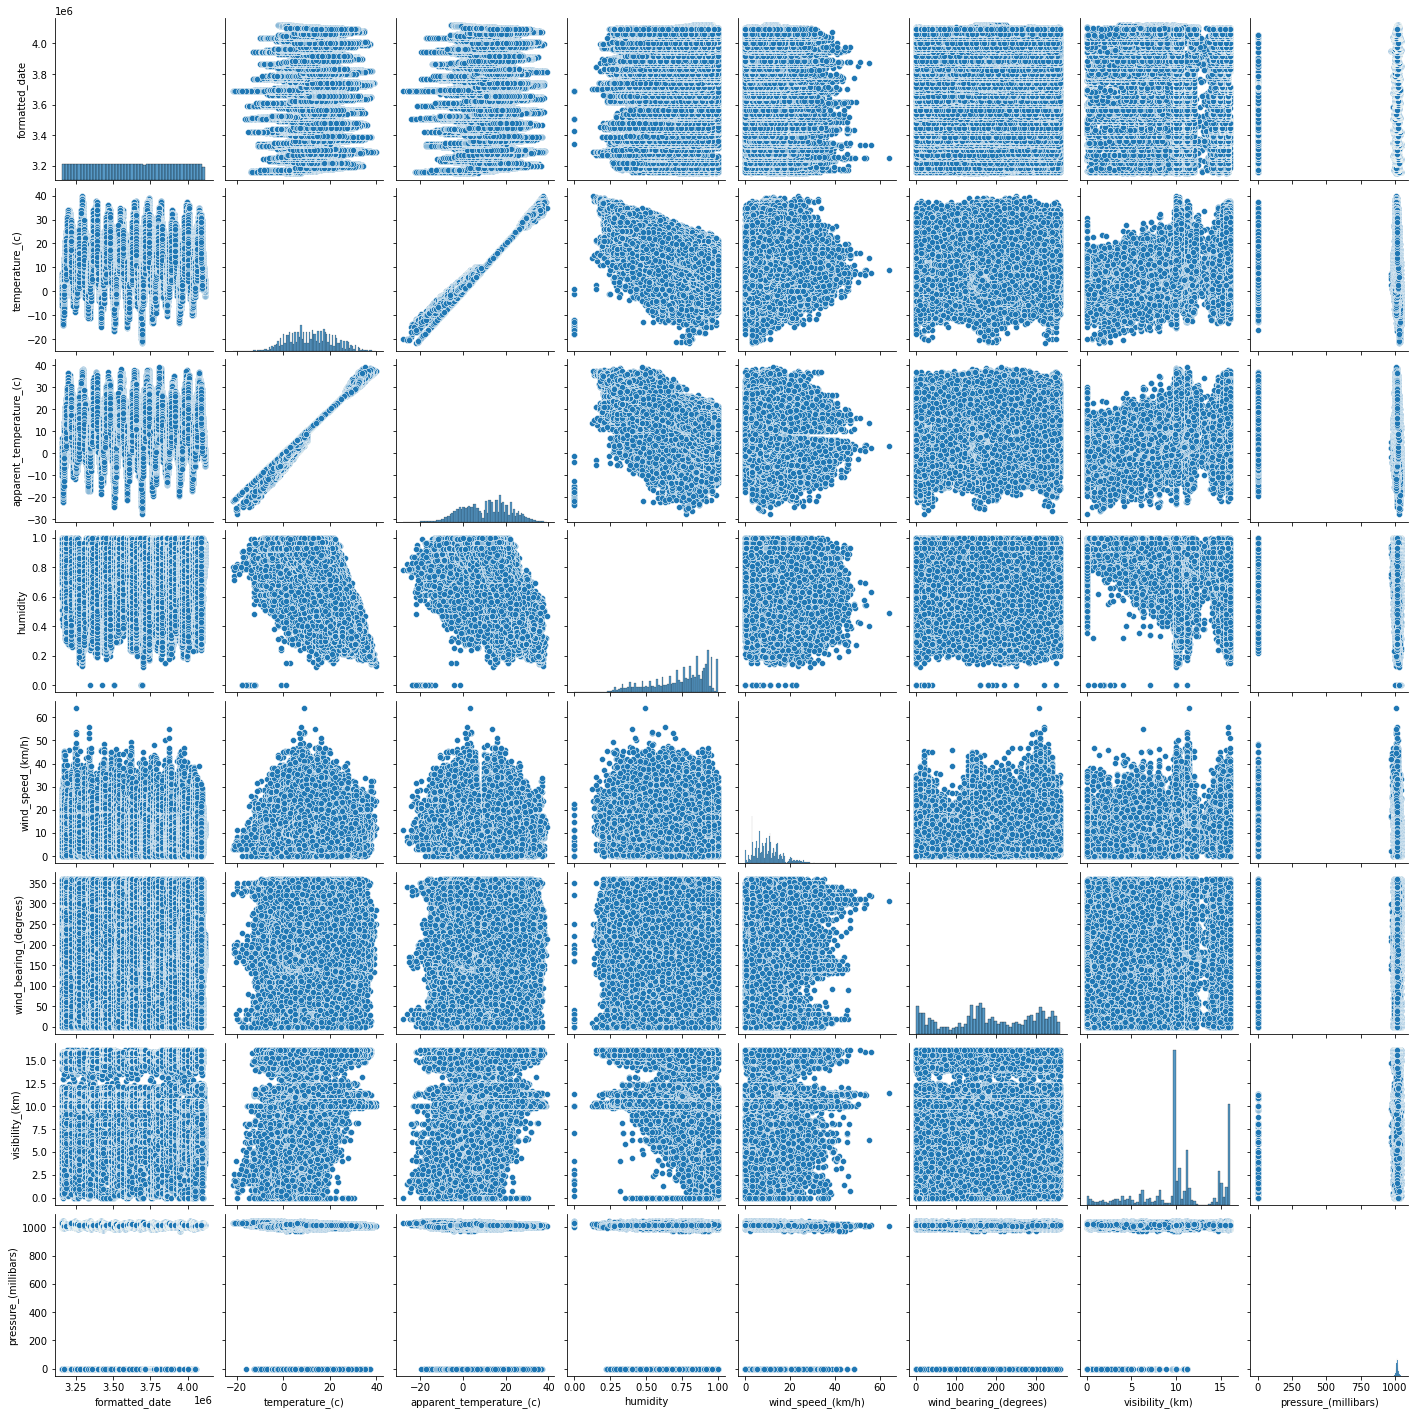

In [12]:
sns.pairplot(customers_df)
plt.show()

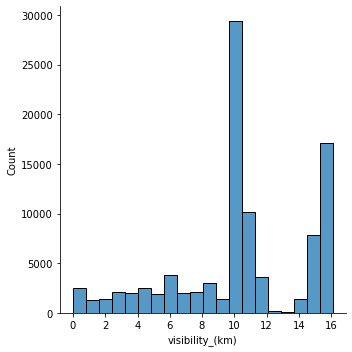

In [13]:
sns.displot((customers_df['visibility_(km)']), bins=20)

In [14]:
# mal mit Lambda rumspielen, verschiedene Werte ausprobieren und schauen, was passiert

#### Checking Multicorrelinilaty

linear regression funktioniert nicht, wenn Multicorreliniality zu hoch (nachlesen)

                          formatted_date  temperature_(c)  \
formatted_date                  1.000000         0.032785   
temperature_(c)                 0.032785         1.000000   
apparent_temperature_(c)        0.033191         0.992637   
humidity                        0.043500        -0.632148   
wind_speed_(km/h)              -0.014173         0.008304   
wind_bearing_(degrees)         -0.027213         0.029937   
visibility_(km)                 0.108048         0.393719   
pressure_(millibars)            0.013113        -0.005253   

                          apparent_temperature_(c)  humidity  \
formatted_date                            0.033191  0.043500   
temperature_(c)                           0.992637 -0.632148   
apparent_temperature_(c)                  1.000000 -0.602390   
humidity                                 -0.602390  1.000000   
wind_speed_(km/h)                        -0.057387 -0.224569   
wind_bearing_(degrees)                    0.028951  0.000814   
vi

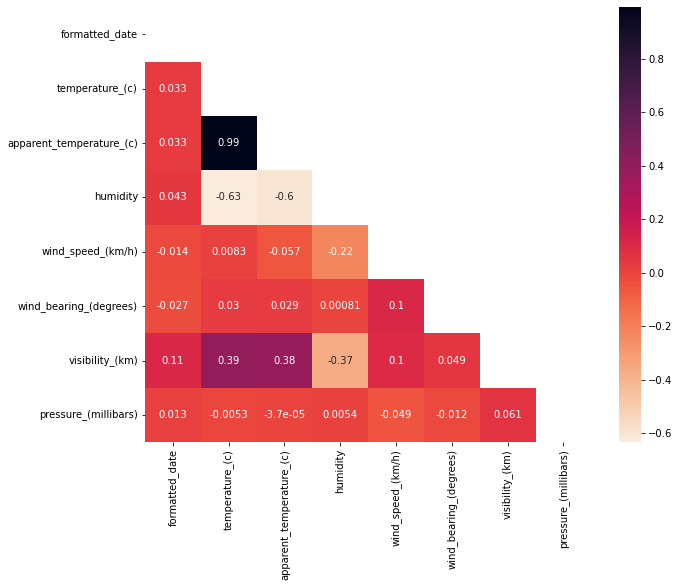

In [15]:

numericals_features=customers_df._get_numeric_data()
correlations = numericals_features.corr()
print(correlations)
cmap = sns.cm.rocket_r  ## for reversing the colors
mask=np.zeros_like(numericals_features.corr())
mask[np.triu_indices_from(mask)]=True
fig, ax=plt.subplots(figsize=(10, 8))
ax=sns.heatmap(numericals_features.corr(), mask=mask, annot=True,cmap=cmap)
plt.show()

## Power Transformer

By default, zero-mean, unit-variance normalization is applied to the transformed data

pt = PowerTransformer()
median_transformed=pt.fit_transform(customers_df['monthly_premium_auto'].to_numpy().reshape(-1,1))
sns.displot(median_transformed)

pt = PowerTransformer()
median_transformed=pt.fit_transform(customers_df['total_claim_amount'].to_numpy().reshape(-1,1))
sns.displot(median_transformed)

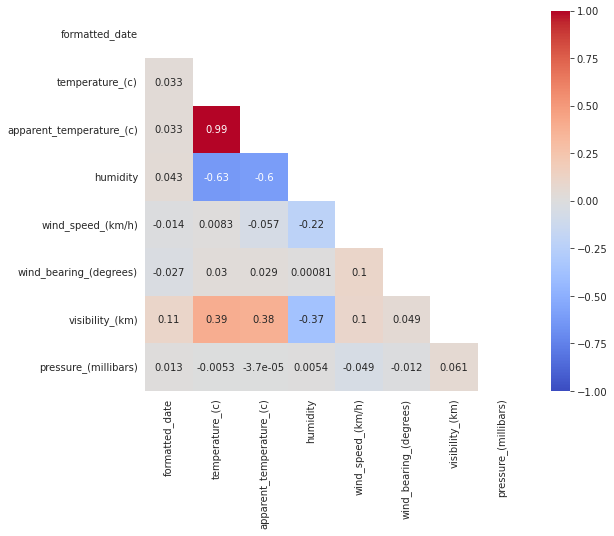

In [16]:
corr = customers_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

## Highly Correlated Columns

In [17]:
corr_matrix=customers_df.corr().abs()
upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
[column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]

['apparent_temperature_(c)']

## dropping highly correlated features

In [18]:
customers_df.drop(["apparent_temperature_(c)"],axis=1,inplace=True)

## Identify numeric columns

In [19]:
cols = customers_df.columns

num_cols = customers_df._get_numeric_data().columns

num_cols

Index(['formatted_date', 'temperature_(c)', 'humidity', 'wind_speed_(km/h)',
       'wind_bearing_(degrees)', 'visibility_(km)', 'pressure_(millibars)'],
      dtype='object')

## Identify categorical columns

In [20]:
categorical=list(set(cols) - set(num_cols))

In [21]:
categorical=customers_df.select_dtypes('object')
categorical

,summary,precip_type,daily_summary
0,Partly Cloudy,rain,Partly cloudy throughout the day.
1,Partly Cloudy,rain,Partly cloudy throughout the day.
2,Mostly Cloudy,rain,Partly cloudy throughout the day.
3,Partly Cloudy,rain,Partly cloudy throughout the day.
4,Mostly Cloudy,rain,Partly cloudy throughout the day.
...,...,...,...
96448,Partly Cloudy,rain,Partly cloudy starting in the morning.
96449,Partly Cloudy,rain,Partly cloudy starting in the morning.
96450,Partly Cloudy,rain,Partly cloudy starting in the morning.
96451,Partly Cloudy,rain,Partly cloudy starting in the morning.


## One-Hot coding Categorical Variables

In [22]:
#get dummies from pandas
categorical=customers_df.select_dtypes('object')
categoricals_features=pd.get_dummies(categorical) #Convert categorical variable into dummy/indicator variables
##pd.DataFrame(OneHotEncoder(drop='first').fit_transform(categoricals_features).toarray(),
## columns=OneHotEncoder(drop='first').fit(categoricals_features).get_feature_names(input_features=categoricals_features.columns)).head()
categoricals_features
#categorical

,summary_Breezy,summary_Breezy and Dry,summary_Breezy and Foggy,summary_Breezy and Mostly Cloudy,summary_Breezy and Overcast,summary_Breezy and Partly Cloudy,summary_Clear,summary_Dangerously Windy and Partly Cloudy,summary_Drizzle,summary_Dry,summary_Dry and Mostly Cloudy,summary_Dry and Partly Cloudy,summary_Foggy,summary_Humid and Mostly Cloudy,summary_Humid and Overcast,summary_Humid and Partly Cloudy,summary_Light Rain,summary_Mostly Cloudy,summary_Overcast,summary_Partly Cloudy,summary_Rain,summary_Windy,summary_Windy and Dry,summary_Windy and Foggy,summary_Windy and Mostly Cloudy,summary_Windy and Overcast,summary_Windy and Partly Cloudy,precip_type_rain,precip_type_snow,daily_summary_Breezy and foggy starting in the evening.,daily_summary_Breezy and foggy until morning.,daily_summary_Breezy and mostly cloudy overnight.,daily_summary_Breezy and partly cloudy in the afternoon.,daily_summary_Breezy in the morning and foggy in the evening.,daily_summary_Breezy in the morning and mostly cloudy starting in the evening.,daily_summary_Breezy in the morning and mostly cloudy starting in the morning.,daily_summary_Breezy in the morning and partly cloudy starting in the evening continuing until night.,daily_summary_Breezy overnight and mostly cloudy throughout the day.,daily_summary_Breezy overnight and overcast throughout the day.,daily_summary_Breezy overnight and partly cloudy throughout the day.,daily_summary_Breezy overnight and partly cloudy until evening.,daily_summary_Breezy starting in the afternoon continuing until evening and foggy in the evening.,daily_summary_Breezy starting in the afternoon continuing until evening and foggy starting in the evening.,daily_summary_Breezy starting in the afternoon continuing until night and mostly cloudy starting in the evening.,daily_summary_Breezy starting in the morning continuing until afternoon and mostly cloudy starting in the morning.,daily_summary_Breezy starting in the morning continuing until afternoon and partly cloudy starting in the morning.,daily_summary_Breezy starting in the morning continuing until night.,daily_summary_Breezy starting overnight continuing until afternoon and foggy starting in the morning continuing until evening.,daily_summary_Breezy starting overnight continuing until afternoon and mostly cloudy starting overnight continuing until evening.,daily_summary_Breezy starting overnight continuing until morning and foggy in the evening.,daily_summary_Breezy starting overnight continuing until morning and foggy overnight.,daily_summary_Breezy starting overnight continuing until morning and partly cloudy starting in the morning.,daily_summary_Breezy starting overnight continuing until morning and partly cloudy starting overnight continuing until evening.,daily_summary_Breezy starting overnight continuing until morning.,daily_summary_Breezy until afternoon and mostly cloudy throughout the day.,daily_summary_Breezy until afternoon and overcast throughout the day.,daily_summary_Breezy until evening and foggy in the morning.,daily_summary_Breezy until morning and mostly cloudy throughout the day.,daily_summary_Clear throughout the day.,daily_summary_Drizzle starting in the evening.,daily_summary_Drizzle until morning.,daily_summary_Foggy in the afternoon.,daily_summary_Foggy in the evening.,daily_summary_Foggy in the morning and breezy starting in the afternoon continuing until night.,daily_summary_Foggy in the morning.,daily_summary_Foggy overnight and breezy in the morning.,daily_summary_Foggy overnight.,daily_summary_Foggy starting in the afternoon and breezy starting in the afternoon continuing until evening.,daily_summary_Foggy starting in the afternoon continuing until evening.,daily_summary_Foggy starting in the afternoon continuing until night.,daily_summary_Foggy starting in the afternoon.,daily_summary_Foggy starting in the evening continuing until night.,daily_summary_Foggy starting in the evening.,daily_summary_Foggy starting in the morning continuing 

In [23]:
categoricals_features.shape

(95936, 243)

In [24]:
customers_df.drop(categorical, axis=1, inplace=True)
#customers_df.drop(["apparent_temperature_(c)"],axis=1,inplace=True)

In [25]:
customers_df

,formatted_date,temperature_(c),humidity,wind_speed_(km/h),wind_bearing_(degrees),visibility_(km),pressure_(millibars)
0,3177360.0,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,3177370.0,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,3177380.0,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,3177390.0,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,3177400.0,8.755556,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...
96448,4092910.0,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,4092920.0,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,4092930.0,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,4092940.0,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [26]:
customers_df._get_numeric_data()

,formatted_date,temperature_(c),humidity,wind_speed_(km/h),wind_bearing_(degrees),visibility_(km),pressure_(millibars)
0,3177360.0,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,3177370.0,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,3177380.0,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,3177390.0,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,3177400.0,8.755556,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...
96448,4092910.0,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,4092920.0,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,4092930.0,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,4092940.0,21.522222,0.60,10.5294,20.0,16.1000,1015.95


## Normalize (numerical)

qt = QuantileTransformer(output_distribution='normal')

quantile_transformed=qt.fit_transform(customers_df['total_claim_amount'].to_numpy().reshape(-1,1))
sns.displot(quantile_transformed)



<AxesSubplot:>

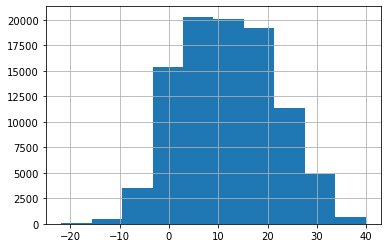

In [27]:
customers_df['temperature_(c)'].hist()

### Predictive Modeling

<b> X Y split

all features need to be addessed to X, except for total_claim_amount, which is our target label

In [28]:
X=customers_df.drop('temperature_(c)', axis=1) 
y=customers_df['temperature_(c)']

In [29]:
y

0         9.472222
1         9.355556
2         9.377778
3         8.288889
4         8.755556
           ...    
96448    26.016667
96449    24.583333
96450    22.038889
96451    21.522222
96452    20.438889
Name: temperature_(c), Length: 95936, dtype: float64

In [30]:
X=X._get_numeric_data()
X

,formatted_date,humidity,wind_speed_(km/h),wind_bearing_(degrees),visibility_(km),pressure_(millibars)
0,3177360.0,0.89,14.1197,251.0,15.8263,1015.13
1,3177370.0,0.86,14.2646,259.0,15.8263,1015.63
2,3177380.0,0.89,3.9284,204.0,14.9569,1015.94
3,3177390.0,0.83,14.1036,269.0,15.8263,1016.41
4,3177400.0,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...
96448,4092910.0,0.43,10.9963,31.0,16.1000,1014.36
96449,4092920.0,0.48,10.0947,20.0,15.5526,1015.16
96450,4092930.0,0.56,8.9838,30.0,16.1000,1015.66
96451,4092940.0,0.60,10.5294,20.0,16.1000,1015.95


<b> Standardize

In [31]:
X_scaled=StandardScaler().fit_transform(X)
X_scaled.shape

(95936, 6)

In [32]:
X_scaled

array([[-1.65232425,  0.79274784,  0.47896434,  0.59115659,  1.30910749,
         0.10215155],
       [-1.65228822,  0.63947007,  0.49990155,  0.66565503,  1.30910749,
         0.10641498],
       [-1.65225219,  0.79274784, -0.99361974,  0.15347822,  1.10080599,
         0.10905831],
       ...,
       [ 1.64639631, -0.89330762, -0.26314359, -1.46686296,  1.37468389,
         0.10667079],
       [ 1.64643234, -0.68893726, -0.03981331, -1.55998601,  1.37468389,
         0.10914358],
       [ 1.64646837, -0.63784467, -0.71213053, -1.38305221,  1.23581623,
         0.11093422]])

## Train-test split

In [33]:
X_scaled= X

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.20, random_state=42)

In [35]:
X_train

,formatted_date,humidity,wind_speed_(km/h),wind_bearing_(degrees),visibility_(km),pressure_(millibars)
49839,3626320.0,0.58,17.7422,319.0,11.2700,1011.34
23605,3363980.0,0.39,20.5597,223.0,10.3523,1010.61
26053,3395650.0,0.59,22.2663,49.0,11.2700,1023.83
3299,3161630.0,0.79,5.1681,211.0,4.9910,1035.62
90469,4040800.0,0.66,9.6439,357.0,10.5777,1026.16
...,...,...,...,...,...,...
6265,3190580.0,0.84,5.1198,137.0,14.5866,1018.20
54964,3692440.0,0.85,10.7387,202.0,3.5742,1012.02
76963,3934310.0,0.90,10.7065,150.0,14.8120,1012.90
860,3209960.0,0.82,0.7728,121.0,9.9820,1012.44


In [36]:
y_test

55053    -0.555556
27411    21.111111
36004    16.600000
69310     1.600000
15875     2.194444
           ...    
70691    17.100000
78059    15.116667
9116     13.155556
6672      6.311111
66221     8.588889
Name: temperature_(c), Length: 19188, dtype: float64

## Apply Linear Regression

### Modeling using Scikit Learn

Model fitting

In [37]:
customers_df

,formatted_date,temperature_(c),humidity,wind_speed_(km/h),wind_bearing_(degrees),visibility_(km),pressure_(millibars)
0,3177360.0,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,3177370.0,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,3177380.0,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,3177390.0,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,3177400.0,8.755556,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...
96448,4092910.0,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,4092920.0,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,4092930.0,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,4092940.0,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [38]:
model = LinearRegression()    # model
model.fit(X_train, y_train)   # model train

LinearRegression()

Making prediction

In [39]:
y_pred=model.predict(X_test)   # model prediction
y_pred_train=model.predict(X_train)

# R2 

In [40]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.44865017424736264

In [41]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

Text(0.5, 1.0, 'Test Set Residual histogram')

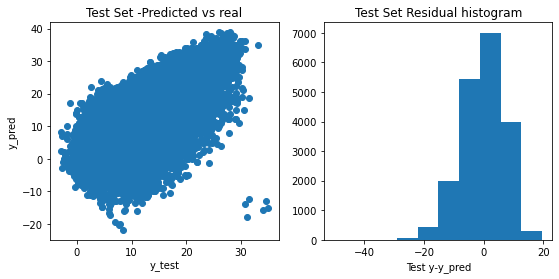

In [42]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A straight line

fig, ax = plt.subplots(1,2,figsize=(9,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscedasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

### Modeling using Statsmodels

In [43]:
X_train = sm.add_constant(X_train) # adding a constant (adds the intercept)
model_sm = sm.OLS(y_train, X_train).fit()
predictions = model_sm.predict(X_train) 

print_model = model_sm.summary()
print(print_model)

# auf R-Squared & Adjusted R-Squared achten, je höher desto besser. 
# Aber ein sehr hoher Wert ist ein Hinweis auf Overfitting

                            OLS Regression Results                            
Dep. Variable:        temperature_(c)   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                 1.059e+04
Date:                Fri, 12 Nov 2021   Prob (F-statistic):               0.00
Time:                        10:03:01   Log-Likelihood:            -2.5915e+05
No. Observations:               76748   AIC:                         5.183e+05
Df Residuals:                   76741   BIC:                         5.184e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     27

In [44]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

Text(0.5, 1.0, 'Test Set Residual histogram')

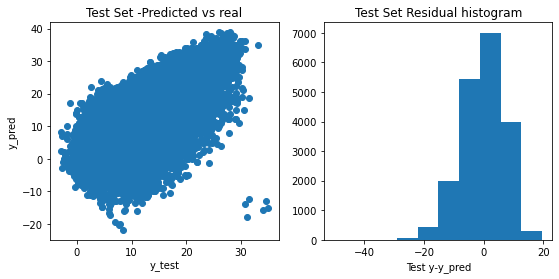

In [45]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,2,figsize=(9,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscedasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

same output using seaborn

In [46]:
y_test

55053    -0.555556
27411    21.111111
36004    16.600000
69310     1.600000
15875     2.194444
           ...    
70691    17.100000
78059    15.116667
9116     13.155556
6672      6.311111
66221     8.588889
Name: temperature_(c), Length: 19188, dtype: float64

In [47]:
y_pred.tolist()

[5.297799947932898,
 12.654626332478454,
 7.8484586206267295,
 14.008718728870729,
 15.062117642289142,
 21.941035575835553,
 9.246067958503794,
 9.063280071753677,
 14.559970387043057,
 9.86802109884546,
 4.736761185268218,
 20.414183236206817,
 9.064200154599114,
 13.910612550298596,
 22.044484397551994,
 5.748318583262094,
 11.556381259726976,
 10.356023150372621,
 21.382045313123914,
 14.121688527177312,
 9.523529084438806,
 25.58327233820117,
 13.956924532092371,
 16.353157382957047,
 20.86063911293055,
 10.511846722650183,
 3.2663231981323904,
 6.010779135903519,
 8.646843516226248,
 4.7731225278921485,
 10.323627106555644,
 2.244541187095617,
 7.897726525954877,
 14.669947260296656,
 23.482063566850293,
 19.409582672143543,
 12.248515848143695,
 11.896454793757243,
 9.538755019833204,
 24.06874934377465,
 6.743635929688516,
 12.503754456761076,
 4.8975078304817465,
 12.600211405915271,
 10.366026122512228,
 13.092397279718112,
 4.875583027000257,
 12.577525133369091,
 9.04685247

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

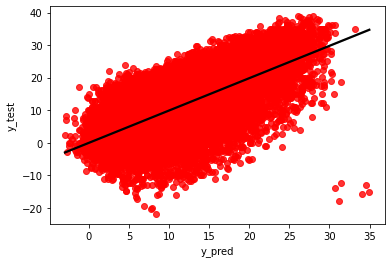

In [48]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

## Model Interpretation

In [49]:
model.coef_

array([ 1.28879460e-06, -2.93766751e+01, -2.06755671e-01,  3.40767466e-03,
        4.17888811e-01, -1.82031479e-03])

# Model Validation

## Description

MSE (Mean squared error regression loss)

In [50]:
mse(y_test,y_pred)

50.27338443060955

RMSE (Random Mean squared error regression loss)

<b>squared: bool, default=True</b>
If True returns MSE value, if False returns RMSE value

In [51]:
mse(y_test,y_pred,squared=False)

7.090372658091361

MAE

In [52]:
mae(y_test,y_pred)

5.672982751393229

In [53]:
# Linear regression

R2

## Write a csv
With `to_csv` 

In [54]:
#customers_df.to_csv("Data/Customer_Analysis_Case_Study_new.csv")